# Ames Housing Dataset: Housing Price Prediction

**An Exploratory and Predictive Analysis**


## Project Context and Objective

This project addresses the challenge of predicting residential housing sale prices in Ames, Iowa, using supervised Machine Learning techniques. The objective is to develop a robust predictive model that enables:

1. **Identifying the main factors that determine a home's price** (size, quality, location, condition, etc.)
2. **Building a regression model with strong predictive performance**, evaluated using MAE, RMSE, and R²
3. **Demonstrating good practices in ML project development**, including data leakage–free preprocessing, cross-validation, overfitting detection, and reproducibility

This analysis combines an Exploratory Data Analysis (EDA) driven by business questions with a modular technical pipeline that ensures the scalability and maintainability of the project.


## Dataset Description

The **Ames Housing** dataset contains detailed information on residential property sales in Ames, Iowa. It includes variables related to:

- **Physical characteristics**: Areas (square feet), number of rooms, number of bathrooms, presence of a basement/garage
- **Quality and condition**: Overall quality ratings, kitchen condition, basement quality
- **Temporal information**: Year built, year remodeled, garage construction year
- **Location and surroundings**: Lot size, street access, porch and deck areas
- **Target variable**: `SalePrice` (sale price in dollars)

The original dataset was downloaded from Kaggle and contains **1,461 records** with **24 predictive variables**.


### Variable Dictionary

Below are the main variables used in this analysis:

| Variable | Description | Range/Values |
|----------|-------------|--------------|
| **1stFlrSF** | First floor area (sq ft) | 334 - 4,692 |
| **2ndFlrSF** | Second floor area (sq ft) | 0 - 2,065 |
| **BedroomAbvGr** | Bedrooms above ground level | 0 - 8 |
| **BsmtExposure** | Basement exposure (walkout/garden level) | Gd, Av, Mn, No, None |
| **BsmtFinType1** | Quality of finished basement area | GLQ, ALQ, BLQ, Rec, LwQ, Unf, None |
| **BsmtFinSF1** | Finished basement area type 1 (sq ft) | 0 - 5,644 |
| **BsmtUnfSF** | Unfinished basement area (sq ft) | 0 - 2,336 |
| **TotalBsmtSF** | Total basement area (sq ft) | 0 - 6,110 |
| **GarageArea** | Garage size (sq ft) | 0 - 1,418 |
| **GarageFinish** | Interior finish of the garage | Fin, Rfn, Unf, None |
| **GarageYrBlt** | Garage construction year | 1900 - 2010 |
| **GrLivArea** | Above-ground living area (sq ft) | 334 - 5,642 |
| **KitchenQual** | Kitchen quality | Ex, Gd, TA, Fa, Po |
| **LotArea** | Lot size (sq ft) | 1,300 - 215,245 |
| **LotFrontage** | Linear feet of street frontage of the property (ft) | 21 - 313 |
| **MasVnrArea** | Masonry veneer area in square feet (sq ft) | 0 - 1,600 |
| **EnclosedPorch** | Enclosed porch area in square feet (sq ft) | 0 - 286 |
| **OpenPorchSF** | Open porch area in square feet (sq ft) | 0 - 547 |
| **OverallQual** | Overall material and finish quality | 1 (very poor) - 10 (excellent) |
| **OverallCond** | Overall condition of the property | 1 (very poor) - 10 (excellent) |
| **WoodDeckSF** | Wood deck area in square feet (sq ft) | 0 - 736 |
| **YearBuilt** | Original construction year | 1872 - 2010 |
| **YearRemodAdd** | Remodel year | 1950 - 2010 |
| **SalePrice** | **Sale price (USD)** | 34,900 - 755,000 |

*Source: `data/house-metadata.txt`*


## Detailed Description of Categorical Variables

Details of the possible values for the categorical variables.

### BsmtExposure: Basement Exposure
Evaluates the exposure of basement walls at garden or walkout level:
- **Gd (Good)**: Good exposure – walls with good visibility and access
- **Av (Average)**: Average exposure – partially visible walls
- **Mn (Minimum)**: Minimum exposure – walls with limited visibility
- **No (No)**: No exposure – walls with no direct visibility
- **None**: No basement – the property does not have a basement

### BsmtFinType1: Basement Finish Type
Rates the finished basement area based on its quality and functionality:
- **GLQ (Good Living Quarters)**: Good living spaces – high-quality finished areas
- **ALQ (Average Living Quarters)**: Average living spaces – standard finishes
- **BLQ (Below Average Living Quarters)**: Below-average living spaces
- **Rec (Average Rec Room)**: Average recreation room – finished recreational areas
- **LwQ (Low Quality)**: Low quality – basic or poor finishes
- **Unf (Unfinished)**: Unfinished – non-finished areas
- **None**: No basement – the property does not have a basement

### KitchenQual: Kitchen Quality
Rates the overall quality of the kitchen:
- **Ex (Excellent)**: Excellent quality
- **Gd (Good)**: Good quality
- **TA (Typical/Average)**: Typical or average quality
- **Fa (Fair)**: Fair quality
- **Po (Poor)**: Poor quality

### GarageFinish: Garage Interior Finish
Describes the level of interior finishing of the garage:
- **Fin (Finished)**: Finished – fully finished garage with interior finishes
- **RFn (Rough Finished)**: Basic finish – garage with minimal interior finishing
- **Unf (Unfinished)**: Unfinished – garage without interior finishes
- **None**: No garage – the property does not have a garage


## Libraries and Configuration


In [14]:
# Import standard libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Visualization settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

notebook_dir = os.getcwd()  # Directory from which the notebook is executed
if 'notebooks' in notebook_dir:
    # If we are inside notebooks/, move one level up
    project_root = os.path.dirname(notebook_dir)
else:
    # If we are at the root, use the current directory
    project_root = notebook_dir

# Add src to the path for imports
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Import project pipeline functions
from data_preprocessing import load_and_clean_data

# Helper function to format prices in plots
def format_currency(x, pos):
    """Formats values as USD currency"""
    return f'${x:,.0f}'

print("✓ Libraries loaded successfully")

✓ Libraries loaded successfully


## Data Loading

We use the `load_and_clean_data()` function from the `data_preprocessing.py` module to automatically load and clean the dataset. This function:

- Loads the CSV file from `data/house_prices_records.csv`
- Handles missing values intelligently based on the variable type
- Validates the presence of required columns
- Returns a clean DataFrame ready for analysis


In [15]:
data_path = os.path.join('..', 'data', 'house_prices_records.csv')

# Check that the file exists before loading
if not os.path.exists(data_path):
    # If it fails, try loading from the project root directory
    data_path = os.path.join(project_root, 'data', 'house_prices_records.csv')

df = load_and_clean_data(data_path)

print(f"✓ Data loaded: {df.shape[0]} records and {df.shape[1]} columns")
df.head()


✓ Data loaded: 1460 records and 24 columns


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,0.0,460,RFn,...,80.0,0.0,0,8,6,1262,0.0,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,0.0,2001,2002,223500
3,961,0.0,0.0,No,216,ALQ,540,0.0,642,Unf,...,60.0,0.0,35,5,7,756,0.0,1915,1970,140000
4,1145,0.0,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,0.0,2000,2000,250000


## Exploratory Data Analysis (EDA)

EDA allows us to understand the distribution of variables, detect patterns, identify relationships with the sale price, and make informed decisions about preprocessing and modeling.

Data preprocessing is handled in `data_preprocessing.py`.

### Data Quality Verification

As a first step, we validate the integrity of the dataset by checking for missing values, duplicates, and data types.


In [16]:
# General dataset information
print("-"*60)
print("GENERAL DATASET INFORMATION")
print("-"*60)
df.info()

print("\n" + "-"*60)
print("DESCRIPTIVE STATISTICS")
print("="*60)
print(df.describe().round(2))

print("\n" + "-"*60)
nulls = df.isnull().sum()
print(nulls[nulls > 0] if nulls.sum() > 0 else "No missing values in the dataset")

print("\n" + "-"*60)
duplicates = df.duplicated().sum()
print(f"{'No duplicate records found' if duplicates == 0 else f'{duplicates} duplicate records found'}")
print("\n")


------------------------------------------------------------
GENERAL DATASET INFORMATION
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1460 non-null   float64
 2   BedroomAbvGr   1460 non-null   float64
 3   BsmtExposure   1460 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1460 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  1460 non-null   float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1460 non-null   object 
 10  GarageYrBlt    1460 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1460 non-null   flo

### How Are Sale Prices Distributed?


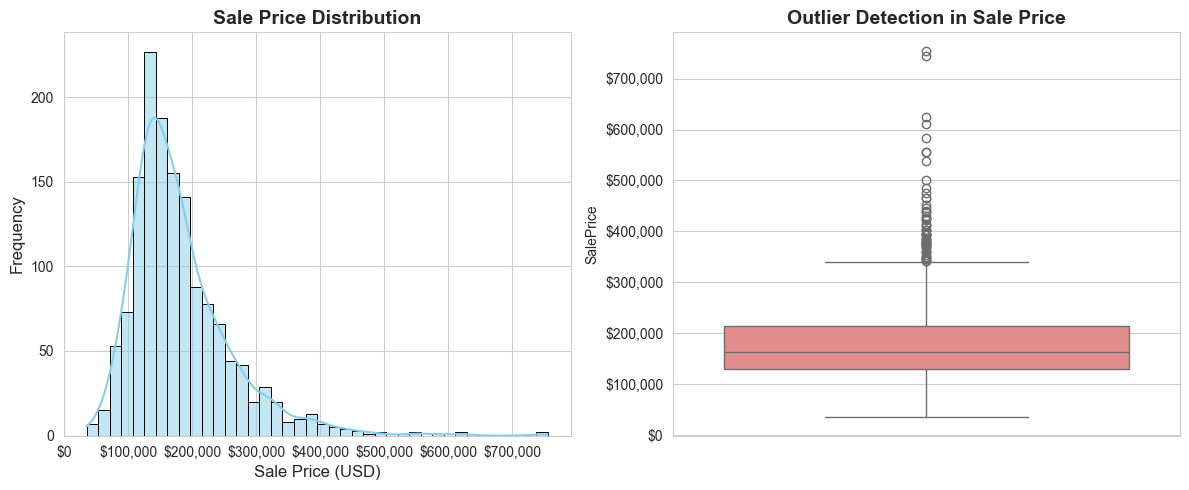


  KEY STATISTICS FOR SalePrice:
   Mean: $180,921.20
   Median: $163,000.00
   Std. Dev.: $79,442.50
   Range: $34,900.00 - $755,000.00


In [17]:
plt.figure(figsize=(12, 5))

# Subplot 1: Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], bins=40, kde=True, color='skyblue', edgecolor='black')
plt.title('Sale Price Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Sale Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_currency))

# Subplot 2: Boxplot to detect outliers
plt.subplot(1, 2, 2)
sns.boxplot(y=df['SalePrice'], color='lightcoral')
plt.title('Outlier Detection in Sale Price', fontsize=14, fontweight='bold')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_currency))

plt.tight_layout()
plt.show()

# Key statistics
print("\n  KEY STATISTICS FOR SalePrice:")
print(f"   Mean: ${df['SalePrice'].mean():,.2f}")
print(f"   Median: ${df['SalePrice'].median():,.2f}")
print(f"   Std. Dev.: ${df['SalePrice'].std():,.2f}")
print(f"   Range: ${df['SalePrice'].min():,.2f} - ${df['SalePrice'].max():,.2f}")


**Observations:**
- The price distribution shows a **positive skewness** (long right tail), indicating that most homes are priced lower, with a few high-value properties.
- The mean price is higher than the median, confirming the presence of outliers on the upper end.


### How Does Living Area Relate to Sale Price?


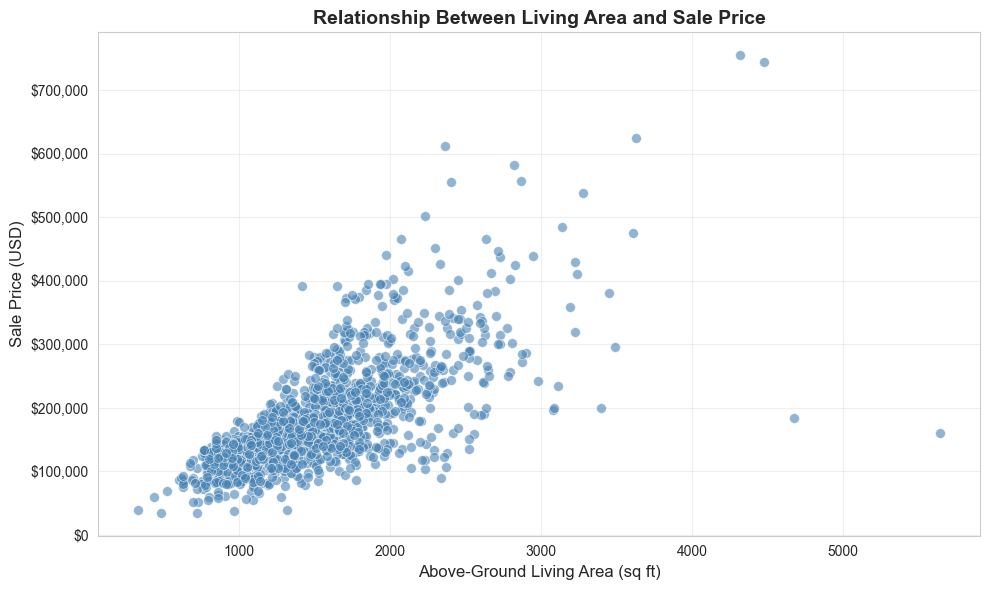


  Correlation between GrLivArea and SalePrice: 0.709
   → There is a strong and positive linear relationship: larger living area is associated with higher prices.


In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, alpha=0.6, s=50, color='steelblue')
plt.title('Relationship Between Living Area and Sale Price', fontsize=14, fontweight='bold')
plt.xlabel('Above-Ground Living Area (sq ft)', fontsize=12)
plt.ylabel('Sale Price (USD)', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_currency))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

correlation_area = df['GrLivArea'].corr(df['SalePrice'])
print(f"\n  Correlation between GrLivArea and SalePrice: {correlation_area:.3f}")
print("   → There is a strong and positive linear relationship: larger living area is associated with higher prices.")


### How Does Overall Home Quality Impact Sale Price?

`OverallQual` evaluates the quality of materials and finishes on a scale from 1 to 10.


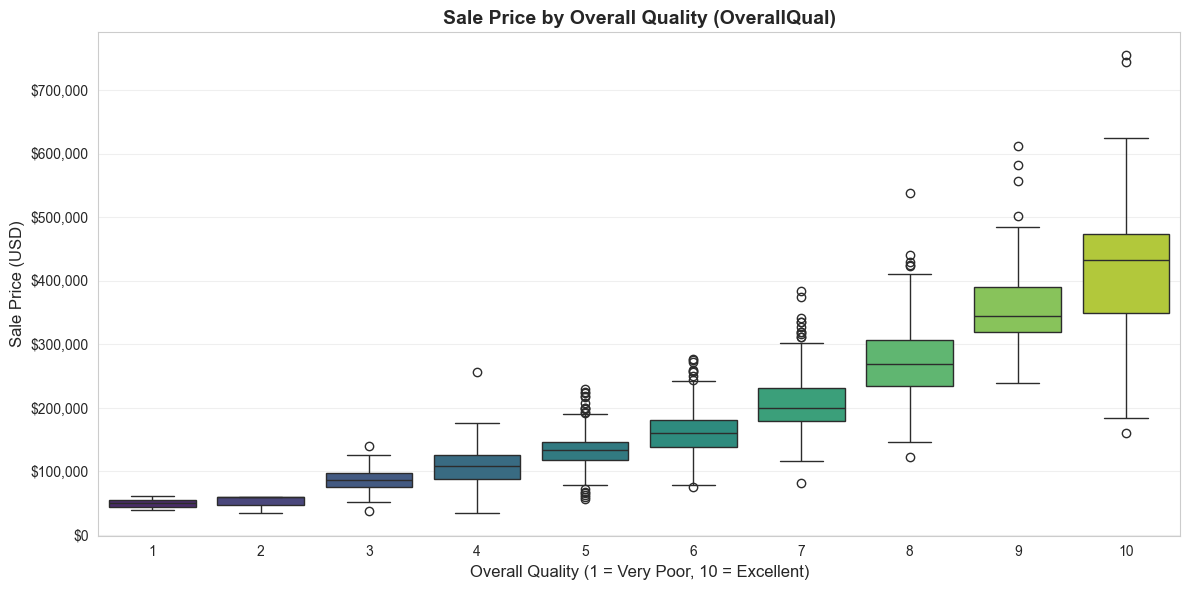


  AVERAGE SALE PRICE BY OVERALL QUALITY:
   Quality 1: $50,150.00
   Quality 2: $51,770.33
   Quality 3: $87,473.75
   Quality 4: $108,420.66
   Quality 5: $133,523.35
   Quality 6: $161,603.03
   Quality 7: $207,716.42
   Quality 8: $274,735.54
   Quality 9: $367,513.02
   Quality 10: $438,588.39


In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df, palette='viridis')
plt.title('Sale Price by Overall Quality (OverallQual)', fontsize=14, fontweight='bold')
plt.xlabel('Overall Quality (1 = Very Poor, 10 = Excellent)', fontsize=12)
plt.ylabel('Sale Price (USD)', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_currency))
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Calculate average price by quality
avg_by_qual = df.groupby('OverallQual')['SalePrice'].mean()
print("\n  AVERAGE SALE PRICE BY OVERALL QUALITY:")
for qual, price in avg_by_qual.items():
    print(f"   Quality {qual}: ${price:,.2f}")


**Observations:**
- There is a **clear and progressive relationship** between overall quality and sale price.
- Properties with quality levels 9–10 have significantly higher prices.
- This variable will be a key predictor in the model.


### How Does the Year of Construction Influence Sale Price?


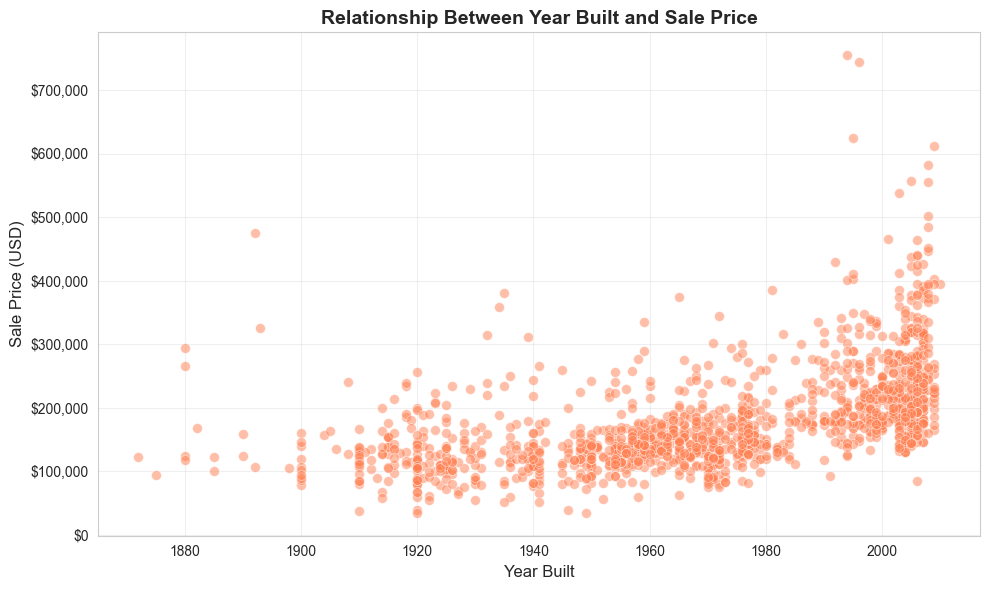


  Correlation between YearBuilt and SalePrice: 0.523


In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df, alpha=0.5, s=50, color='coral')
plt.title('Relationship Between Year Built and Sale Price', fontsize=14, fontweight='bold')
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('Sale Price (USD)', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_currency))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

correlation_year = df['YearBuilt'].corr(df['SalePrice'])
print(f"\n  Correlation between YearBuilt and SalePrice: {correlation_year:.3f}")


### Do Categorical Variables Such as Kitchen Quality and Basement Exposure Affect Sale Price?


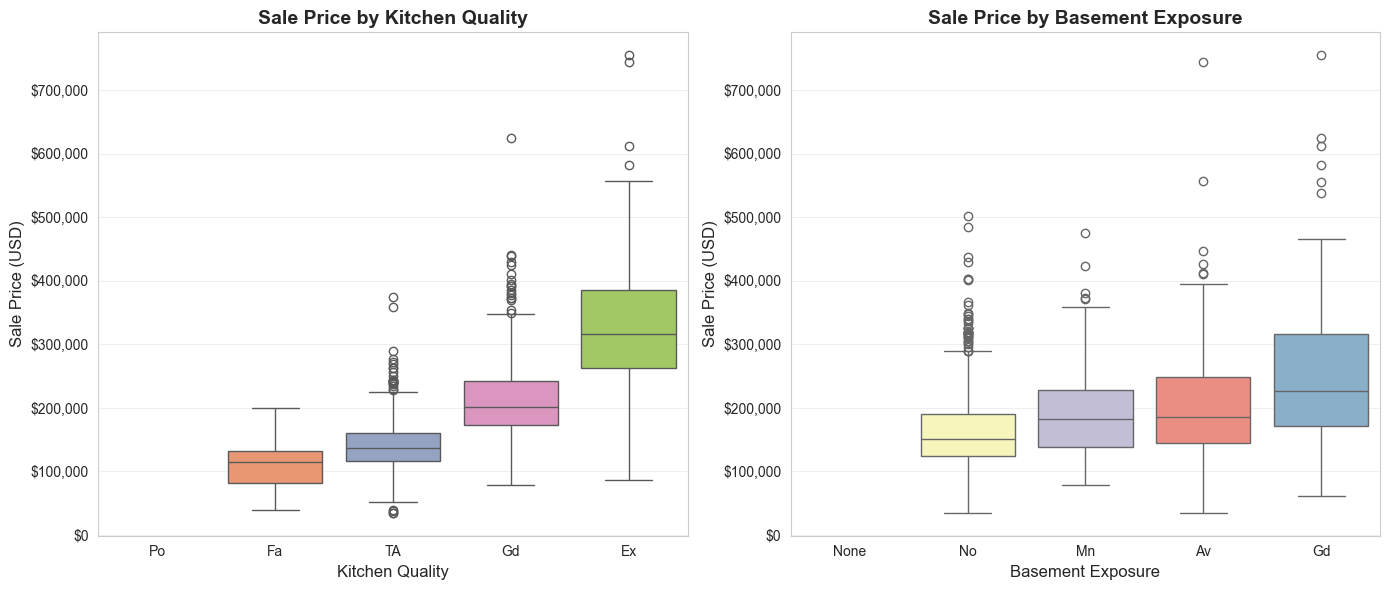

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# KitchenQual
order_kitchen = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
sns.boxplot(x='KitchenQual', y='SalePrice', data=df, order=order_kitchen, palette='Set2', ax=axes[0])
axes[0].set_title('Sale Price by Kitchen Quality', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Kitchen Quality', fontsize=12)
axes[0].set_ylabel('Sale Price (USD)', fontsize=12)
axes[0].yaxis.set_major_formatter(FuncFormatter(format_currency))
axes[0].grid(True, alpha=0.3, axis='y')

# BsmtExposure
order_bsmt = ['None', 'No', 'Mn', 'Av', 'Gd']
sns.boxplot(x='BsmtExposure', y='SalePrice', data=df, order=order_bsmt, palette='Set3', ax=axes[1])
axes[1].set_title('Sale Price by Basement Exposure', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Basement Exposure', fontsize=12)
axes[1].set_ylabel('Sale Price (USD)', fontsize=12)
axes[1].yaxis.set_major_formatter(FuncFormatter(format_currency))
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


### Does the Garage Affect Sale Price?


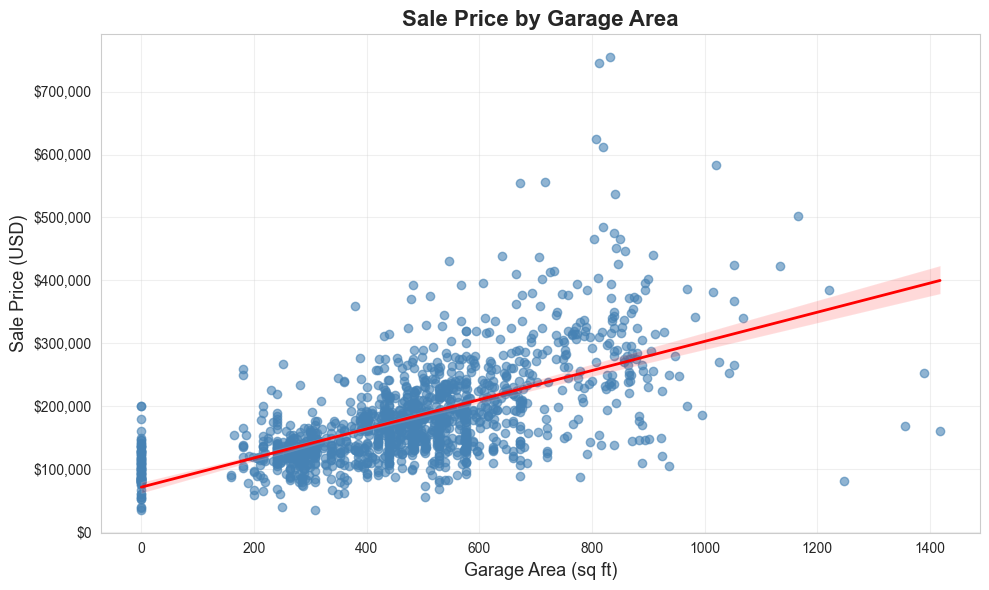

In [22]:
plt.figure(figsize=(10, 6))

sns.regplot(x='GarageArea', y='SalePrice', data=df, 
            scatter_kws={'alpha': 0.6, 'color': 'steelblue'}, 
            line_kws={'color': 'red', 'linewidth': 2}, 
            ci=95)

plt.title('Sale Price by Garage Area', fontsize=16, fontweight='bold')
plt.xlabel('Garage Area (sq ft)', fontsize=13)
plt.ylabel('Sale Price (USD)', fontsize=13)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_currency))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Correlation Matrix: Numerical Variables


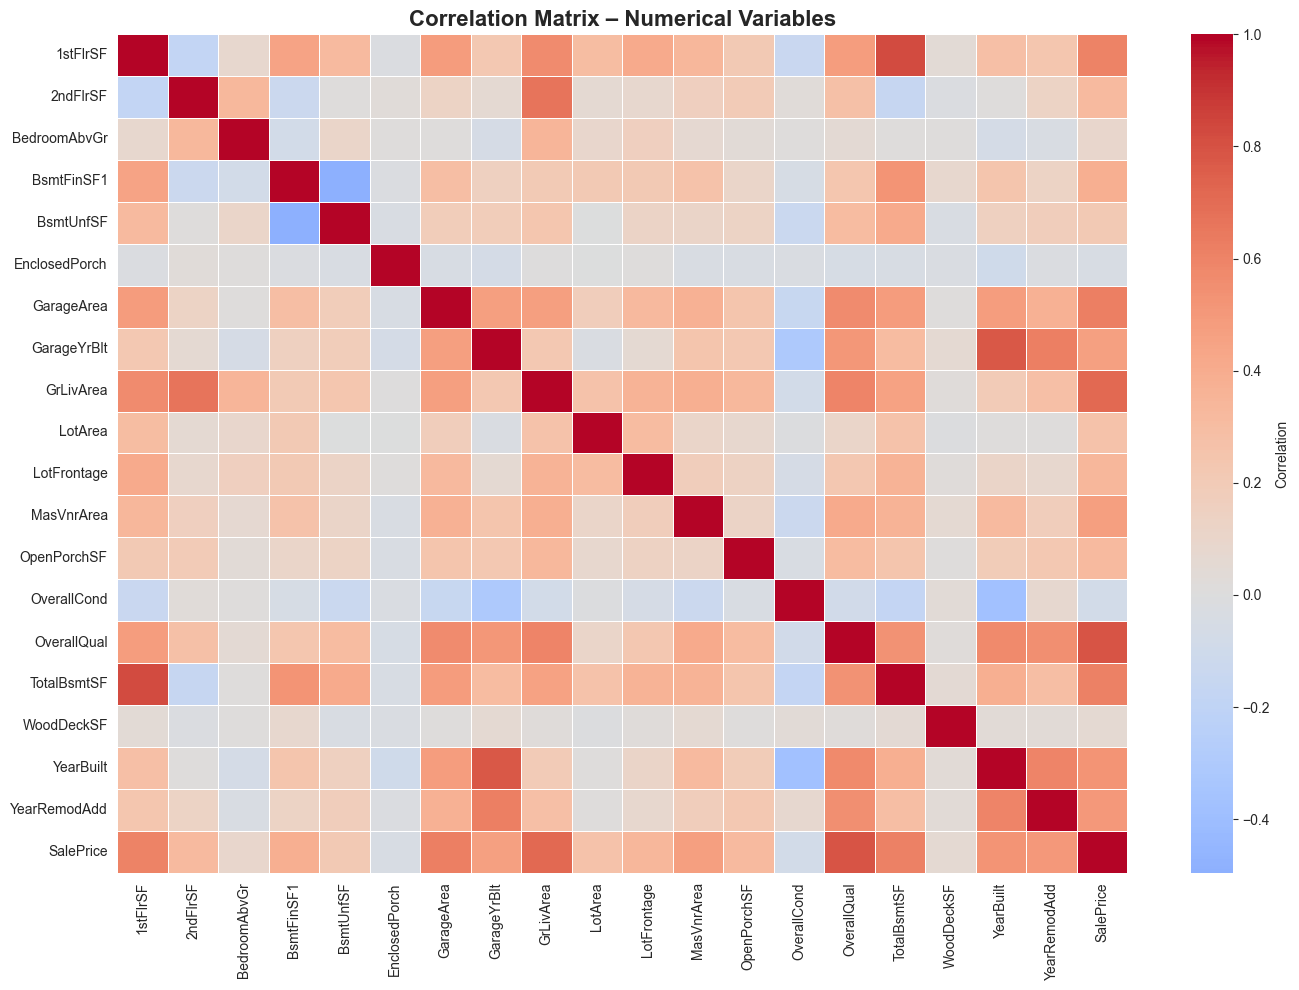


  TOP 10 VARIABLES MOST CORRELATED WITH SalePrice:
   OverallQual         : 0.791
   GrLivArea           : 0.709
   GarageArea          : 0.623
   TotalBsmtSF         : 0.614
   1stFlrSF            : 0.606
   YearBuilt           : 0.523
   YearRemodAdd        : 0.507
   MasVnrArea          : 0.473
   GarageYrBlt         : 0.467
   BsmtFinSF1          : 0.386


In [23]:
# Select only numerical variables
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=False,
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)
plt.title('Correlation Matrix – Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Top 10 correlations with SalePrice
print("\n  TOP 10 VARIABLES MOST CORRELATED WITH SalePrice:")
top_corr = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)[1:11]
for var, corr_val in top_corr.items():
    print(f"   {var:20s}: {corr_val:.3f}")


### How Have Housing Prices Evolved by Construction Decade?

The age of the property and market trends over time can reveal patterns of value appreciation.


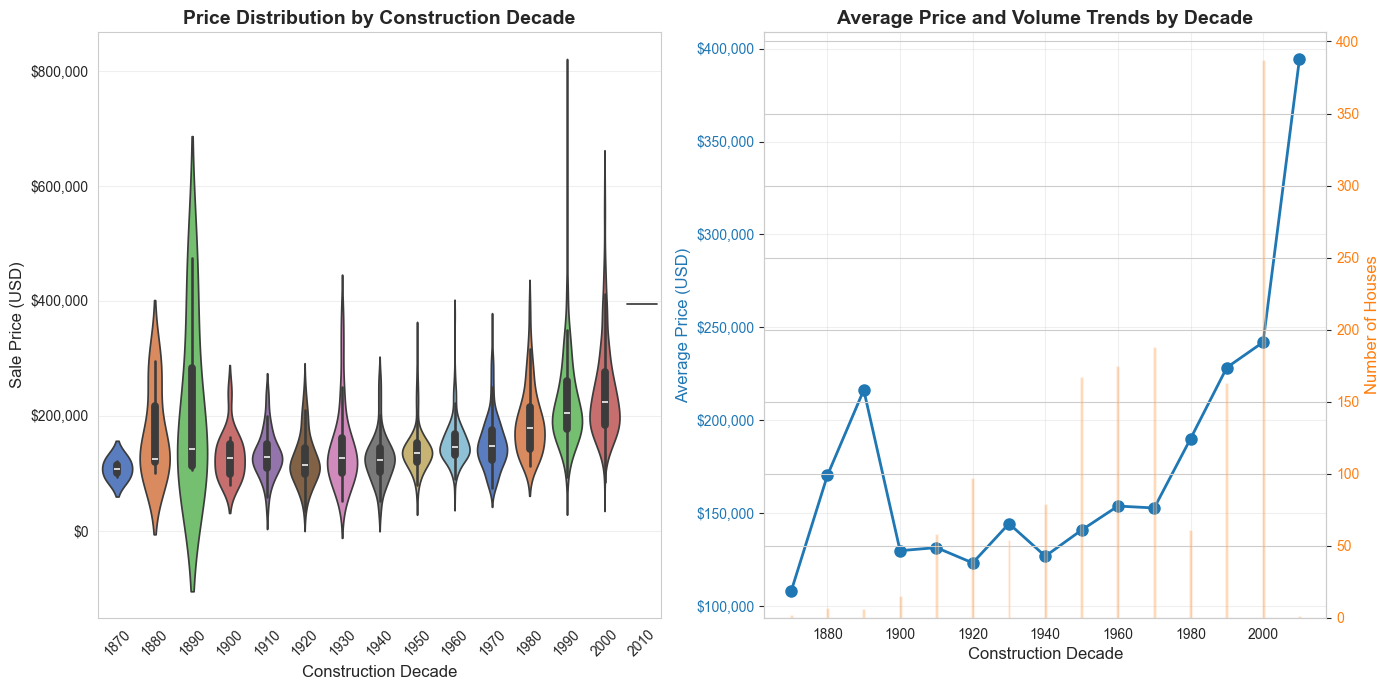


  AVERAGE PRICE AND COUNT BY DECADE:
   1870s: $108,000.00 | n=2 houses
   1880s: $170,425.57 | n=7 houses
   1890s: $216,316.67 | n=6 houses
   1900s: $129,828.40 | n=15 houses
   1910s: $131,511.48 | n=58 houses
   1920s: $123,268.35 | n=97 houses
   1930s: $144,415.83 | n=54 houses
   1940s: $126,887.48 | n=79 houses
   1950s: $140,935.67 | n=167 houses
   1960s: $153,852.64 | n=175 houses
   1970s: $152,828.34 | n=188 houses
   1980s: $190,080.33 | n=61 houses
   1990s: $228,404.22 | n=163 houses
   2000s: $242,046.42 | n=387 houses
   2010s: $394,432.00 | n=1 houses


In [24]:
df['Decade'] = (df['YearBuilt'] // 10) * 10

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
decades_order = sorted(df['Decade'].unique())
sns.violinplot(x='Decade', y='SalePrice', data=df, palette='muted', order=decades_order)
plt.title('Price Distribution by Construction Decade', fontsize=14, fontweight='bold')
plt.xlabel('Construction Decade', fontsize=12)
plt.ylabel('Sale Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_currency))
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 2, 2)
decade_stats = df.groupby('Decade').agg({
    'SalePrice': 'mean',
    'YearBuilt': 'count'
}).reset_index()
decade_stats.columns = ['Decade', 'AvgPrice', 'Count']

ax1 = plt.gca()
color = 'tab:blue'
ax1.plot(decade_stats['Decade'], decade_stats['AvgPrice'], marker='o', 
         linewidth=2, markersize=8, color=color, label='Average Price')
ax1.set_xlabel('Construction Decade', fontsize=12)
ax1.set_ylabel('Average Price (USD)', fontsize=12, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.yaxis.set_major_formatter(FuncFormatter(format_currency))
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.bar(decade_stats['Decade'], decade_stats['Count'], alpha=0.3, color=color, label='Number of Houses')
ax2.set_ylabel('Number of Houses', fontsize=12, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Average Price and Volume Trends by Decade', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n  AVERAGE PRICE AND COUNT BY DECADE:")
for _, row in decade_stats.iterrows():
    print(f"   {int(row['Decade'])}s: ${row['AvgPrice']:,.2f} | n={int(row['Count'])} houses")


**Observations:**
- There is a **clear upward trend**: more recently built homes have higher average prices.
- The 1990–2000 and 2000–2010 decades show the highest average prices.
- Price variability is greater for newer constructions, indicating higher diversity in the modern housing market.
- Construction volume also increased in recent decades, reflecting urban growth.


### How Do Overall Quality and Overall Condition Interact in Sale Price?

`OverallQual` measures materials and finishes, while `OverallCond` evaluates the property's maintenance condition.


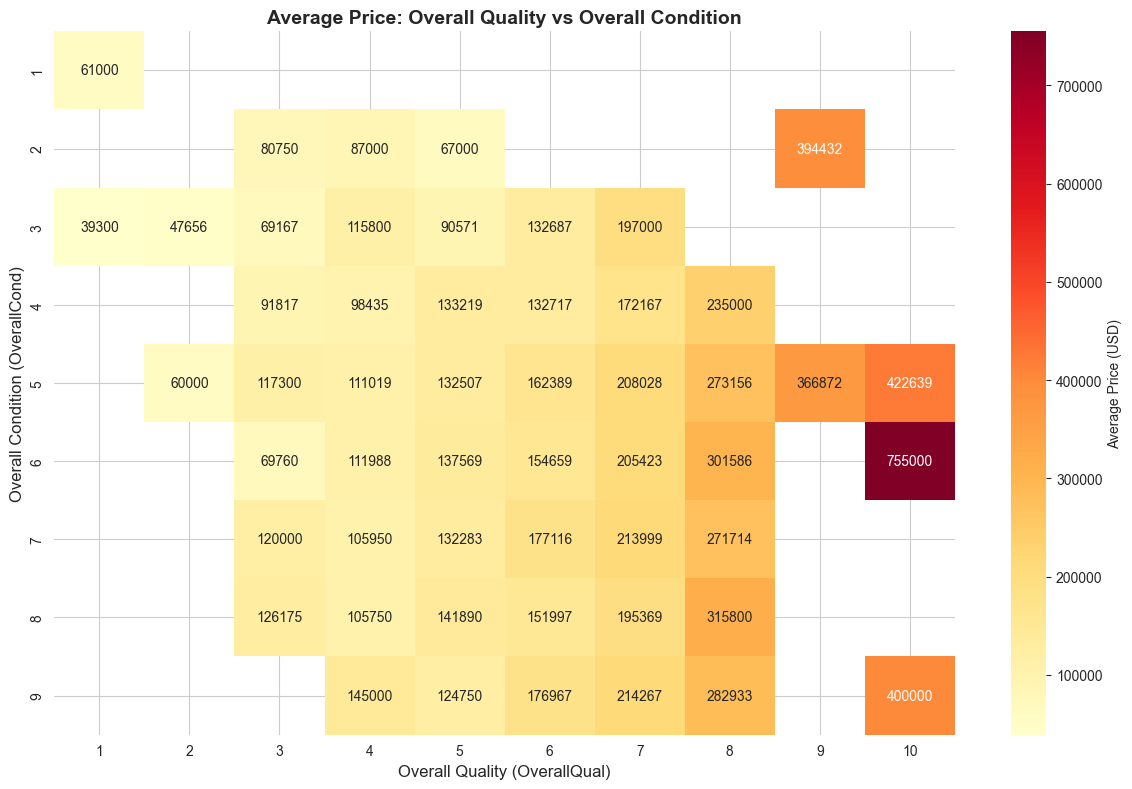


 Correlation between OverallQual and SalePrice: 0.791
 Correlation between OverallCond and SalePrice: -0.078


In [25]:
# Create a combined variable to analyze interaction
df['Qual_Cond'] = df['OverallQual'].astype(str) + '-' + df['OverallCond'].astype(str)

# Group and calculate average price
qual_cond_price = df.groupby(['OverallQual', 'OverallCond'])['SalePrice'].mean().reset_index()

# Pivot for heatmap
pivot_data = qual_cond_price.pivot(index='OverallCond', columns='OverallQual', values='SalePrice')

plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_data,
    annot=True,
    fmt='.0f',
    cmap='YlOrRd',
    cbar_kws={'label': 'Average Price (USD)'}
)
plt.title('Average Price: Overall Quality vs Overall Condition', fontsize=14, fontweight='bold')
plt.xlabel('Overall Quality (OverallQual)', fontsize=12)
plt.ylabel('Overall Condition (OverallCond)', fontsize=12)
plt.tight_layout()
plt.show()

# Correlations
print(f"\n Correlation between OverallQual and SalePrice: {df['OverallQual'].corr(df['SalePrice']):.3f}")
print(f" Correlation between OverallCond and SalePrice: {df['OverallCond'].corr(df['SalePrice']):.3f}")


**Observations:**
- **Overall quality (OverallQual)** has a dominant impact on sale price, far stronger than overall condition.
- Homes with high quality (8–10) maintain high prices even when their condition is average.
- The optimal combination is high quality plus good condition, reaching the highest prices.


### How Does the Area–Price Relationship Vary by Number of Bedrooms?

The number of bedrooms can modify the relationship between living area and price, indicating different market segments.


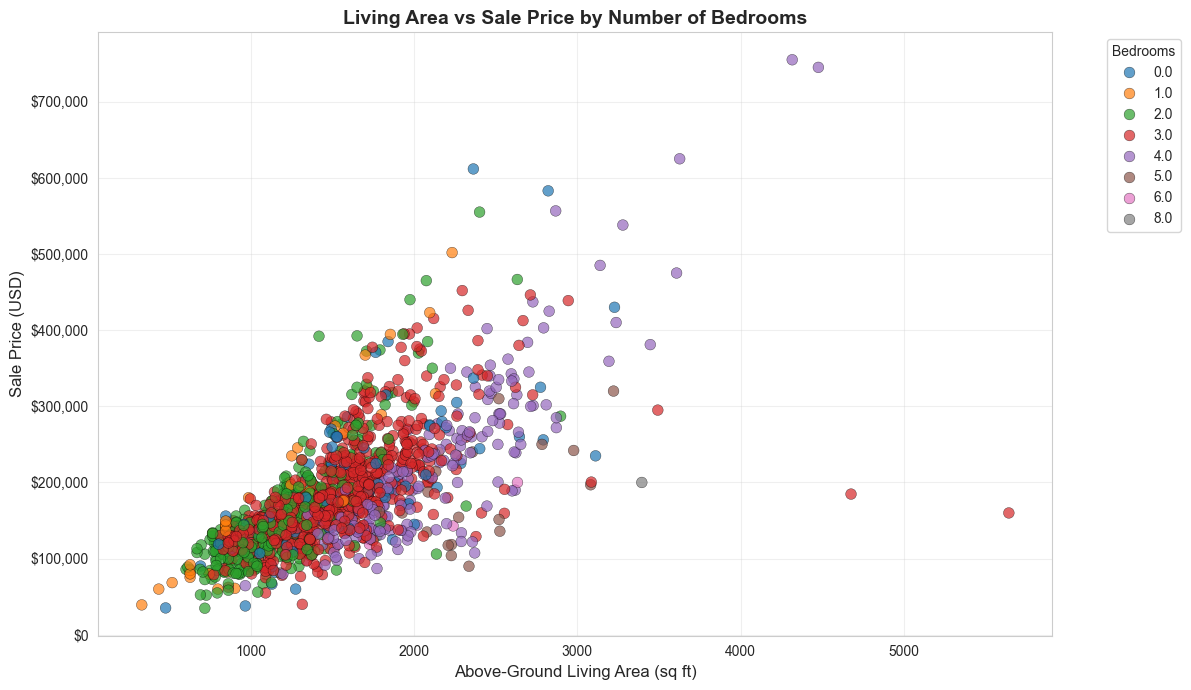

In [26]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='GrLivArea',
    y='SalePrice',
    hue='BedroomAbvGr',
    data=df,
    palette='tab10',
    alpha=0.7,
    s=60,
    edgecolor='black',
    linewidth=0.3
)
plt.title('Living Area vs Sale Price by Number of Bedrooms', fontsize=14, fontweight='bold')
plt.xlabel('Above-Ground Living Area (sq ft)', fontsize=12)
plt.ylabel('Sale Price (USD)', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_currency))
plt.legend(title='Bedrooms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



**Observations:**
- The area–price relationship remains positive regardless of the number of bedrooms.
- Homes with more bedrooms do not necessarily have higher prices when the living area is similar.
- There is a segment of large homes with fewer bedrooms (more open spaces) that reach premium prices.


## Preprocessing Decisions

Based on the EDA, the following technical decisions are made to prepare the data prior to model training:

### 1. Handling Missing Values
- **Areas/surfaces** (GarageArea, MasVnrArea, etc.): Replaced with **0** (logical absence of that area).
- **Years** (YearBuilt, GarageYrBlt): Replaced with the **median** to ensure robustness against outliers.
- **Continuous measures** (LotFrontage, LotArea): Replaced with the **mean** to preserve scale.
- **Categorical variables** (BsmtExposure, KitchenQual): Replaced with logical values such as `'None'` or `'No'`, or with representative average categories (e.g., `'TA'`).

**Implementation:** `_clean_missing_values()` function in `data_preprocessing.py`.

### 2. Transformation and Scaling
- **Numerical variables**: Standardization using `StandardScaler` to prevent features with larger magnitudes from dominating the model.
- **Categorical variables**: Encoding with `OneHotEncoder` (using `handle_unknown='ignore'` for robustness in production).

**Implementation:** Pipeline with `ColumnTransformer` in `train_model.py`.

### 3. Data Leakage Prevention
- All preprocessing steps are fitted **only on the training data** (`.fit()` on train, `.transform()` on test).
- The pipeline is saved together with the trained model to ensure consistency in future predictions.

### 4. Train/Test Split
- **80% training, 20% testing** with `random_state=42` for reproducibility.
- Cross-validation using **GridSearchCV** to optimize hyperparameters without bias.


## EDA Conclusions

### Key Insights

1. **Price distribution**: Positively skewed with outliers on the upper end. The median is more representative than the mean.

2. **Strongest predictors**:
   - `GrLivArea` (living area): Very strong correlation with sale price.
   - `OverallQual` (overall quality): Clear and progressive relationship with price.
   - `YearBuilt` (year built): More recent properties tend to have higher prices.
   
3. **Relevant categorical variables**:
   - `KitchenQual`: Excellent-quality kitchens significantly increase property value.
   - `BsmtExposure`: Basements with good exposure add value.
   
4. **Potential multicollinearity**: Area-related variables (1stFlrSF, TotalBsmtSF, GrLivArea) are highly correlated with each other. The model should handle this (e.g., through regularization or feature selection).

5. **Data quality**: The dataset is clean after automated preprocessing. There are no missing values or duplicate records.

### Next Steps

With these insights, we proceed to:
- Train multiple regression models (RandomForest, GradientBoosting, DecisionTree).
- Optimize hyperparameters using GridSearchCV and cross-validation.
- Evaluate performance using MAE, RMSE, and R² metrics.
- Analyze errors and feature importance for interpretability.

**See the `Modeling_Report.ipynb` notebook for the complete technical modeling analysis.**
